# Predicting Ofsted Downgrades in UK Secondary Schools

## Project Overview

This Jupyter notebook is structured into **five major sections**, guiding through a complete data science project pipeline:

1. **Business Problem & Data Sources** – Framing the context and goal of the analysis  
2. **Data Collection & Preprocessing** – Acquiring and preparing the datasets  
3. **Exploratory Data Analysis (EDA)** – Uncovering patterns and feature relationships  
4. **Predictive Modeling: Logistic Regression** – Building and evaluating the downgrade prediction model  
5. **Insights, Recommendations & Hypothetical Scenario** – Interpreting results and simulating real-world application  

---

## <u>1. Business Problem & Data Sources</u>

### Problem Statement

In the majority of cases, schools do not experience an abrupt decline in quality. Rather, before an Ofsted inspection results in a downgraded rating (eg: transition from "Good" to "Requires Improvement") there are typically early warning signs of trouble. These indicators may include subtle declines in student attainment, increasing absence rates, or decreasing progress scores. However, these early warning signals are often overlooked until it becomes too late for effective intervention.
This project proposes the development of a data-driven early warning system, utilizing publicly available datasets from the Department for Education (DfE) and Ofsted. The primary objective is to identify schools that are currently rated as "Good" but exhibit early patterns commonly observed in schools that eventually face downgrades. By recognizing these patterns at an early stage, local authorities, academy trusts, and school leaders can take proactive steps to intervene before a school’s quality deteriorates further. The tool developed in this project will serve several key purposes. 
1. Flagging at-risk schools before official downgrades occur: Identifying schools showing early signs of decline enables timely action. 
2. Enabling targeted interventions earlier in the decline cycle: Proactive measures can be implemented to address areas of weakness before they escalate. 
3. Improving student outcomes and reducing the long-term cost of recovery: Early intervention can mitigate the consequences of underperformance, leading to better educational results and less need for costly corrective actions in the future.

### Objective

This project seeks to develop a **predictive model** that leverages publicly available performance data and historical Ofsted ratings to **identify secondary schools at risk of being downgraded**. The aim is to enable policymakers, local authorities, or educational support teams to intervene earlier, prioritizing support for schools showing early warning signs of decline.

### Data Sources

We use two main open datasets:

- [Key Stage 4 (KS4) Performance Data – Department for Education (DfE)](https://www.compare-school-performance.service.gov.uk/download-data)
- [Ofsted Inspection Outcomes](https://www.gov.uk/government/collections/ofsted-inspections-statistical-releases)

These datasets include school-level academic performance indicators and official inspection outcomes, providing a rich foundation for analysis and modeling.

---

## Technical Setup

We will use the following Python libraries to perform our analysis:

- `pandas` for structured data handling  
- `numpy` for numerical operations  
- `seaborn` and `matplotlib` for visualizations  
- `scikit-learn` (`sklearn`) for machine learning modeling and evaluation  

This toolkit provides all necessary functionality for data cleaning, exploration, feature engineering, and building interpretable classification models.


In [145]:
# Library Imports

# Data manipulation and numerical computing
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models and evaluation tools
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## <u>2. Data Collection & Preprocessing</u>

### Data Collection Overview

The data used in this project is sourced from publicly accessible government databases that provide detailed information on school performance and inspection outcomes in England. The primary goal is to integrate academic performance data with Ofsted inspection results to facilitate predictive modeling.

---

### KS4 School Performance Data

We utilize datasets from the **Department for Education's Compare School Performance Service**, which provide key performance indicators for all secondary schools in England.  
**Source:** [DfE KS4 School Performance Data](https://www.compare-school-performance.service.gov.uk/download-data)

The following academic years are included:
- **2021–2022**
- **2022–2023**
- **2023–2024**

Each dataset contains metrics such as:
- **Progress 8**: A measure of student progress from primary to secondary school
- **Attainment 8**: A composite score based on performance across eight GCSE subjects
- **GCSE Grade 5+ (English and Maths)**: Percentage of students passing core subjects
- **EBacc Entry Percentage**: Reflects curriculum breadth
- **Absence Rate Percentage**: A proxy for student engagement

These datasets are loaded and prepared for merging and further analysis.


In [2]:
df_2021 = pd.read_excel(r"D:\WARWICK\MODULES\TERM 2\Programming for Data Analytics\Data\2021-2022_england_ks4final.xlsx")

In [3]:
df_2022 = pd.read_excel(r"D:\WARWICK\MODULES\TERM 2\Programming for Data Analytics\Data\2022-2023_england_ks4final.xlsx")

In [4]:
df_2023 = pd.read_excel(r"D:\WARWICK\MODULES\TERM 2\Programming for Data Analytics\Data\2023-2024_england_ks4revised.xlsx")

### Ofsted Inspection Data

In addition to academic performance, this project incorporates **Ofsted inspection outcomes** to define our target variable: whether a school has been downgraded.

**Source:** [Ofsted Statistical Releases](https://www.gov.uk/government/collections/ofsted-inspections-statistical-releases)

This dataset includes:
- Historical and most recent inspection ratings
- Phase and type of school
- Other contextual attributes

These inspection ratings will be combined with the KS4 performance data to identify patterns associated with downgrades.

---

### Preparing for Data Integration

Each KS4 dataset is imported and labeled by academic year. After cleaning and standardizing column names, the datasets will be merged into a unified, time-aware DataFrame. This allows us to:
- Track changes in performance over time per school
- Detect patterns of decline
- Join with Ofsted data using the school URN (Unique Reference Number)

This integrated dataset will serve as the analytical foundation for both exploratory analysis and predictive modeling.


In [5]:
# Select important columns and add 'Year' for each dataset

df_2021 = df_2021[['URN', 'P8MEA', 'ATT8SCR', 'PTL2BASICS_95', 'PTEBACC_E_PTQ_EE', 'TAVENT_G_PTQ_EE']]
df_2021['Year'] = 2021

df_2022 = df_2022[['URN', 'P8MEA', 'ATT8SCR', 'PTL2BASICS_95', 'PTEBACC_E_PTQ_EE', 'TAVENT_G_PTQ_EE']]
df_2022['Year'] = 2022

df_2023 = df_2023[['URN', 'P8MEA', 'ATT8SCR', 'PTL2BASICS_95', 'PTEBACC_E_PTQ_EE', 'TAVENT_G_PTQ_EE']]
df_2023['Year'] = 2023

### Combine the Datasets

We now concatenate the yearly datasets into a single DataFrame using `pd.concat()`.  
This approach results in **one row per school per year**, with a `Year` column to retain temporal context.

Combining the datasets enables us to:
- Monitor trends over time (e.g., performance decline)
- Prepare the data for longitudinal analysis and feature engineering


In [6]:
# Combine all three datasets into a single DataFrame
combined_df = pd.concat([df_2021, df_2022, df_2023], ignore_index=True)


### Preview the Combined Dataset

Before proceeding to cleaning or transformation, we inspect the first few rows of the merged dataset using `.head()`.

This quick check confirms:
- That columns from all three academic years have been aligned properly
- Each row represents a unique school-year observation
- The `Year` column is correctly appended


In [7]:
# Display the first 8 rows of the combined dataset
combined_df.head(8)


,URN,P8MEA,ATT8SCR,PTL2BASICS_95,PTEBACC_E_PTQ_EE,TAVENT_G_PTQ_EE,Year
0,100003.0,NP,36.9,1,0,3.5,2021
1,100001.0,NP,58.9,0,0,6.3,2021
2,100544.0,NP,5.8,0,0,1.1,2021
3,NaN,NaN,NaN,NaN,NaN,NaN,2021
4,100053.0,-0.3,50.5,0.53,0.48,7.7,2021
5,100092.0,-3.61,1.5,0,0,0.3,2021
6,100054.0,0.73,68.7,0.87,0.71,8.9,2021
7,142408.0,NP,NE,NE,NE,NE,2021


### Rename Columns for Clarity

To enhance readability and ensure clarity in both visualizations and model interpretation, we rename the selected variables with more descriptive and intuitive labels.

This step supports:
- Improved documentation and reporting
- Clearer feature names during exploratory analysis and modeling
- Better communication of results to non-technical stakeholders


In [8]:
# Rename columns to make them more readable
combined_df.rename(columns={
    'URN': 'School_URN',
    'P8MEA': 'Progress_8',
    'ATT8SCR': 'Attainment_8',
    'PTL2BASICS_95': 'GCSE_Grade5_EnglishMaths_Percent',
    'PTEBACC_E_PTQ_EE': 'EBacc_Entry_Percent',
    'TAVENT_G_PTQ_EE': 'Absence_Rate_Percent'
}, inplace=True)


### Check for Missing Values

Before proceeding to analysis or export, we perform a missing value check across all columns.

This helps to:
- Identify potential data quality issues
- Determine whether imputation or row removal is necessary
- Ensure model inputs remain reliable and complete


In [9]:
# Check for missing values in each column
combined_df.isnull().sum()


School_URN                          465
Progress_8                          389
Attainment_8                        386
GCSE_Grade5_EnglishMaths_Percent    386
EBacc_Entry_Percent                 386
Absence_Rate_Percent                386
Year                                  0
dtype: int64

### Handle Missing Values

Upon detecting missing values in key performance indicators, we assess the extent of data loss.  
Given that only a small proportion of rows contain null values, we opt to remove them rather than impute, in order to maintain data integrity.

This results in a cleaner dataset for analysis and modeling, without introducing assumptions through imputation.


In [10]:
combined_df.dropna(inplace=True)

In [11]:
# Verifying the change
combined_df.isnull().sum()


School_URN                          0
Progress_8                          0
Attainment_8                        0
GCSE_Grade5_EnglishMaths_Percent    0
EBacc_Entry_Percent                 0
Absence_Rate_Percent                0
Year                                0
dtype: int64

### Export the Cleaned Dataset

After handling missing values and standardizing the structure, we export the cleaned dataset to an Excel file.

This version will serve as the foundation for further analysis, feature engineering, and modeling in the subsequent stages of the project.


In [12]:
# Save to your specific directory
combined_df.to_excel(r"D:\WARWICK\MODULES\TERM 2\Programming for Data Analytics\Data\cleaned_ks4_data.xlsx", index=False)


## Ofsted Inspection Dataset

In this section, we introduce a second dataset sourced from Ofsted, which provides inspection outcomes for schools in England. This dataset plays a central role in defining the target variable for our predictive model.

### Objectives

- **Filter** the dataset to include only **secondary schools**, aligning it with the KS4 performance data.
- **Compare** the previous and most recent inspection ratings to identify schools that have been **downgraded**.
- **Generate** a new binary column `Downgraded`, where:
  - `1` indicates a school that was downgraded from "Outstanding" or "Good" to "Requires Improvement" or "Inadequate"
  - `0` indicates no downgrade occurred
- **Merge** this outcome data with the cleaned KS


In [13]:
# Load the raw Ofsted file (manually cleaned version)
df_ofsted_raw = pd.read_excel(r"D:\WARWICK\MODULES\TERM 2\Programming for Data Analytics\Most Recent Inspections - Ofsted.xlsx")

In [14]:
# Display the first few rows and columns to understand its structure
df_ofsted_raw.head()

,Web link,URN,LAESTAB,School name,Ofsted phase,Type of education,School open date,Admissions policy,Sixth form,Designated religious character,...,School type at time of previous graded inspection,Previous graded inspection overall effectiveness,Previous category of concern,Previous quality of education,Previous behaviour and attitudes,Previous personal development,Previous effectiveness of leadership and management,Previous safeguarding is effective?,Previous early years provision (where applicable),Previous sixth form provision (where applicable)
0,Ofsted School Webpage,100000,2013614,The Aldgate School,Primary,Voluntary Aided School,NaT,Not applicable,Does not have a sixth form,Church of England,...,Voluntary Aided School,1.0,NaN,9.0,9.0,9.0,1.0,9,9.0,9.0
1,Ofsted School Webpage,100005,2021048,Thomas Coram Centre,Nursery,LA Nursery School,NaT,Not applicable,Not applicable,Does not apply,...,LA Nursery School,1.0,NaN,9.0,9.0,9.0,1.0,9,1.0,9.0
2,Ofsted School Webpage,100006,2021100,Heath School,PRU,Pupil Referral Unit,1999-09-01,Not applicable,Not applicable,Does not apply,...,Pupil Referral Unit,2.0,NaN,9.0,9.0,9.0,2.0,9,9.0,9.0
3,Ofsted School Webpage,100007,2021101,Camden Primary Pupil Referral Unit,PRU,Pupil Referral Unit,NaT,Not applicable,Not applicable,Does not apply,...,Pupil Referral Unit,2.0,NaN,9.0,9.0,9.0,2.0,9,9.0,9.0
4,Ofsted School Webpage,100008,2022019,Argyle Primary School,Primary,Community School,NaT,Not applicable,Does not have a sixth form,Does not apply,...,Community School,2.0,NaN,9.0,9.0,9.0,2.0,9,2.0,9.0


#### Display dataset to understand structure

---

### Select Relevant Ofsted Columns

To streamline the dataset and focus on our modeling objective, we retain only the columns essential for identifying inspection outcomes:

- **URN**: Unique identifier used to join with KS4 data  
- **School name**: For contextual understanding  
- **Ofsted phase**: To filter only secondary schools  
- **Previous graded inspection overall effectiveness**: Historical Ofsted rating  
- **Overall effectiveness**: Most recent inspection rating

This subset allows us to define and construct the `Downgraded` target variable with clarity and precision.


In [16]:
# Select only relevant columns from Ofsted dataset
df_ofsted = df_ofsted_raw[[
    'URN',
    'School name',
    'Ofsted phase',
    'Previous graded inspection overall effectiveness',
    'Overall effectiveness'
]]

In [147]:
# Display the dataset
df_ofsted

,URN,School name,Ofsted phase,Previous graded inspection overall effectiveness,Overall effectiveness,Previous_Rating,Current_Rating,Downgraded
0,100000,The Aldgate School,Primary,1.0,1,1,1,0
1,100005,Thomas Coram Centre,Nursery,1.0,1,1,1,0
2,100006,Heath School,PRU,2.0,2,2,2,0
3,100007,Camden Primary Pupil Referral Unit,PRU,2.0,2,2,2,0
4,100008,Argyle Primary School,Primary,2.0,2,2,2,0
...,...,...,...,...,...,...,...,...
21985,151538,Barnwood Park School,Secondary,2.0,2,2,2,0
21986,151540,Lovers Lane Primary and Nursery School,Primary,3.0,3,3,3,0
21987,151541,Ash Grove School,PRU,3.0,3,3,3,0
21988,151614,Thomas Ashton School,Special,2.0,4,2,4,1


In [21]:
# checking data types
df_ofsted.dtypes

URN                                                   int64
School name                                          object
Ofsted phase                                         object
Previous graded inspection overall effectiveness    float64
Overall effectiveness                                object
dtype: object

### Convert Rating Columns to Integer Format

In order to apply logical conditions for downgrade detection, both the **previous** and **current** Ofsted ratings must be in a consistent numeric format.

Before conversion, we examine the unique values in the `Overall effectiveness` column to identify any non-numeric entries (e.g., `'Not judged'`) that may cause errors during typecasting. These rows are removed to ensure clean, reliable comparisons between ratings.

This step is essential for enabling binary classification of schools as downgraded or not.


In [23]:
# Show unique values in the current Ofsted rating column
df_ofsted['Overall effectiveness'].unique()


array([1, 2, 'Not judged', 3, 4], dtype=object)

### Remove Non-Numeric Ratings and Convert Columns

To ensure accurate numerical comparisons, we first remove rows where the `Overall effectiveness` rating is `'Not judged'`, as these are non-quantifiable outcomes.

Next, we convert both:
- `Previous graded inspection overall effectiveness`
- `Overall effectiveness`

into integer format. This conversion enables reliable logic-based operations for constructing the downgrade flag in the next step.


In [27]:
# Remove rows where 'Overall effectiveness' is 'Not judged'
df_ofsted = df_ofsted[df_ofsted['Overall effectiveness'] != 'Not judged']

In [26]:
# Drop rows where 'Previous graded inspection overall effectiveness' is missing
df_ofsted = df_ofsted.dropna(subset=['Previous graded inspection overall effectiveness'])

In [28]:
# Convert both columns to integers
df_ofsted['Previous_Rating'] = df_ofsted['Previous graded inspection overall effectiveness'].astype(int)
df_ofsted['Current_Rating'] = df_ofsted['Overall effectiveness'].astype(int)

In [29]:
# checking data types
df_ofsted.dtypes

URN                                                   int64
School name                                          object
Ofsted phase                                         object
Previous graded inspection overall effectiveness    float64
Overall effectiveness                                object
Previous_Rating                                       int64
Current_Rating                                        int64
dtype: object

### Data Type Check Insights

After checking the data types in the `df_ofsted` dataset, we observed the following insights:

- **URN** (int64): Correct data type for the unique school identifiers. This column is ready for use in the model.
- **School name** (object): This is categorical data (text), and we need to encode it for use in the model (e.g., label encoding or one-hot encoding).
- **Ofsted phase** (object): This column is categorical (e.g., "Primary", "Secondary"). It needs encoding as well for modeling.
- **Previous graded inspection overall effectiveness** (float64): Correct data type for the previous inspection ratings. This numeric data is ready for analysis and modeling.
- **Overall effectiveness** (object): Although this column contains categorical values (e.g., 'Good', 'Outstanding'), we need to convert it into numeric format for machine learning models (e.g., using label encoding).
- **Previous_Rating & Current_Rating** (int64): These are numeric ratings and are correctly formatted for use in the model.


In [32]:
# Displaying top 5
df_ofsted.head()

,URN,School name,Ofsted phase,Previous graded inspection overall effectiveness,Overall effectiveness,Previous_Rating,Current_Rating
0,100000,The Aldgate School,Primary,1.0,1,1,1
1,100005,Thomas Coram Centre,Nursery,1.0,1,1,1
2,100006,Heath School,PRU,2.0,2,2,2
3,100007,Camden Primary Pupil Referral Unit,PRU,2.0,2,2,2
4,100008,Argyle Primary School,Primary,2.0,2,2,2


### Insights:
 1. **Data Structure**: Columns like URN, School name, and Ofsted ratings are as expected.
 2. **Missing Values**: Check for any missing values that need handling.
 3. **Data Types**: Ensure columns have correct data types (e.g., URN as int, School name as string).
 4. **Feature Ranges**: Check if numerical columns (e.g., Progress 8, Absence Rate) have valid values.
 5. **Label Consistency**: Ensure categorical columns (e.g., Ofsted phase, Overall effectiveness) are consistent.


### Create the `Downgraded` Flag

To define the target variable for our classification task, we construct a binary flag named `Downgraded`.

A school is considered **downgraded** if:
- The **previous Ofsted rating** was either **"Outstanding" (1)** or **"Good" (2)**
- And the **current rating** has declined to either **"Requires Improvement" (3)** or **"Inadequate" (4)**

Schools meeting this condition are assigned `Downgraded = 1`; all others are assigned `0`.

This target variable will be used to train and evaluate our predictive model.


In [34]:
# Create Downgraded flag based on change from good ratings to lower ones
df_ofsted['Downgraded'] = df_ofsted.apply(
    lambda row: 1 if row['Previous_Rating'] in [1, 2] and row['Current_Rating'] in [3, 4] else 0,
    axis=1
)


### Inspect `Downgraded` Flag Distribution

To understand the class balance in our dataset, we examine the distribution of the `Downgraded` flag.

This step helps us:
- Assess potential class imbalance, which may impact model training and evaluation
- Understand how common downgrade events are relative to stable inspection outcomes


In [36]:
# Count how many schools were downgraded vs. not downgraded
df_ofsted['Downgraded'].value_counts()


Downgraded
0    18749
1     1110
Name: count, dtype: int64

### Insights
- **18,749 schools** are **not downgraded** (represented by `0`).
- **1,110 schools** have been **downgraded** (represented by `1`).



### Merge Ofsted Ratings with KS4 Performance Data

We now merge the Ofsted inspection outcomes with the cleaned KS4 performance dataset using the common identifier: `School_URN`.

This operation results in a **consolidated dataset** that includes:
- Yearly academic performance metrics
- Corresponding downgrade labels derived from Ofsted inspections

The merged dataset serves as the foundation for all subsequent exploratory analysis and predictive modeling.


In [38]:
# Merge KS4 performance data with Ofsted downgrade labels
final_df = pd.merge(
    combined_df,
    df_ofsted[['URN', 'Downgraded']],
    left_on='School_URN',
    right_on='URN',
    how='inner'
)

In [39]:
# Show the first few rows of the merged dataset
final_df.head()

,School_URN,Progress_8,Attainment_8,GCSE_Grade5_EnglishMaths_Percent,EBacc_Entry_Percent,Absence_Rate_Percent,Year,URN,Downgraded
0,100053.0,-0.3,50.5,0.53,0.48,7.7,2021,100053,0
1,100092.0,-3.61,1.5,0,0,0.3,2021,100092,0
2,100054.0,0.73,68.7,0.87,0.71,8.9,2021,100054,0
3,100052.0,0.14,47.1,0.45,0.55,7,2021,100052,0
4,100049.0,-0.02,49.9,0.53,0.35,6.3,2021,100049,0


### Save the Final Merged Dataset

We export the fully merged dataset—which now includes both academic performance indicators and the `Downgraded` classification—  
to an Excel file.

This exported file will be used for:
- Exploratory data analysis (EDA)
- Feature engineering
- Machine learning model development


In [41]:
# Save final merged dataset to your specified folder
final_df.to_excel(r"D:\WARWICK\MODULES\TERM 2\Programming for Data Analytics\Data\final_school_data_with_downgrades.xlsx", index=False)


## <u>3. Exploratory Data Analysis (EDA)</u>

Before proceeding to feature engineering or modeling, we conduct an initial exploration of the final merged dataset.

### Why Perform EDA?

Exploratory Data Analysis (EDA) helps us:
- Understand the overall structure and quality of the dataset
- Uncover trends, patterns, and relationships between variables
- Detect anomalies, missing values, or data type inconsistencies
- Inform feature selection and guide modeling decisions

### What We Will Do

In this phase, we will:
- Inspect dataset dimensions and data types
- Convert non-numeric columns into appropriate formats
- Generate summary statistics and visualizations
- Explore how key performance metrics differ between downgraded and non-downgraded schools

This structured EDA ensures that our model is built on well-understood, clean, and meaningful data.


In [42]:
# View dataset shape and info
print("Shape of dataset:", final_df.shape)
final_df.info()


Shape of dataset: (10399, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10399 entries, 0 to 10398
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   School_URN                        10399 non-null  float64
 1   Progress_8                        10399 non-null  object 
 2   Attainment_8                      10399 non-null  object 
 3   GCSE_Grade5_EnglishMaths_Percent  10399 non-null  object 
 4   EBacc_Entry_Percent               10399 non-null  object 
 5   Absence_Rate_Percent              10399 non-null  object 
 6   Year                              10399 non-null  int64  
 7   URN                               10399 non-null  int64  
 8   Downgraded                        10399 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 731.3+ KB


### Dataset Overview
- **Shape:** 10,399 rows, 9 columns.
- **Data Types:** 1 `float64`, 3 `int64`, 5 `object` (need conversion).
- **No missing values.**
- **Key Feature:** `Downgraded` column for predictive modeling.

#### Memory Usage: 731.3 KB.


In [46]:
final_df.dtypes

School_URN                          float64
Progress_8                           object
Attainment_8                         object
GCSE_Grade5_EnglishMaths_Percent     object
EBacc_Entry_Percent                  object
Absence_Rate_Percent                 object
Year                                  int64
URN                                   int64
Downgraded                            int64
dtype: object

### Dataset Overview
- **Shape:** 10,399 rows, 9 columns.
- **Data Types:** 
  - 1 `float64` (School_URN)
  - 3 `int64` (Year, URN, Downgraded)
  - 5 `object` (performance metrics, need conversion).

#### Memory Usage: 731.3 KB.


### Convert Performance Columns to Numeric

Several key performance columns are currently stored as `object` (string) data types due to the presence of non-numeric entries or formatting inconsistencies in the source files.

To enable statistical analysis, aggregation, and modeling, we convert these columns to numeric (`float`) types using `pd.to_numeric()`.

This conversion is essential for:
- Generating summary statistics (mean, standard deviation, etc.)
- Visualizing trends and distributions
- Training machine learning models that require numerical input features


In [47]:
# Convert key columns to numeric (invalid values will become NaN)
cols_to_convert = [
    'Progress_8',
    'Attainment_8',
    'GCSE_Grade5_EnglishMaths_Percent',
    'EBacc_Entry_Percent',
    'Absence_Rate_Percent'
]

for col in cols_to_convert:
    final_df[col] = pd.to_numeric(final_df[col], errors='coerce')


### Code Explanation ^

The code converts specific columns in the `final_df` DataFrame to numeric types. Here's how it works:

1. **Columns to Convert**: The following columns are targeted for conversion:
   - `Progress_8`
   - `Attainment_8`
   - `GCSE_Grade5_EnglishMaths_Percent`
   - `EBacc_Entry_Percent`
   - `Absence_Rate_Percent`

2. **`for` loop**: It iterates over each column in the `cols_to_convert` list and applies the conversion.

3. **`pd.to_numeric()`**: This function attempts to convert the values in each column to numeric types:
   - **`errors='coerce'`**: Invalid values (like non-numeric strings) are replaced with `NaN`.

### Purpose:
- Converts performance-related columns into numeric types for analysis or modeling.
- Invalid values are handled by replacing them with `NaN`.

---

### Summary Statistics

We compute basic descriptive statistics—including mean, standard deviation, minimum, and maximum values—for the key performance indicators.

This provides an initial understanding of:
- The central tendency and spread of each variable
- Potential outliers or data skewness
- The typical performance ranges of schools across the dataset

These insights help guide data transformation choices and inform modeling strategies in later stages.


In [48]:
# Display summary statistics for performance columns
final_df[['Progress_8', 'Attainment_8', 'GCSE_Grade5_EnglishMaths_Percent',
          'EBacc_Entry_Percent', 'Absence_Rate_Percent']].describe()


,Progress_8,Attainment_8,GCSE_Grade5_EnglishMaths_Percent,EBacc_Entry_Percent,Absence_Rate_Percent
count,9172.000000,9226.000000,6163.000000,6163.000000,9226.000000
mean,-0.169564,43.743768,0.439179,0.360924,6.862248
std,0.729422,15.587421,0.223873,0.265362,2.077838
min,-4.120000,0.000000,0.000000,0.000000,0.000000
25%,-0.450000,39.800000,0.315000,0.150000,6.500000
50%,-0.070000,45.700000,0.443000,0.312000,7.300000
75%,0.290000,51.600000,0.570000,0.542500,7.900000
max,2.300000,88.200000,1.000000,1.000000,12.300000


### Visualize the Distribution of Performance Metrics Using Histograms

We create **histograms** to visualize the distribution of key performance metrics, such as **Progress 8**, **Attainment 8**, and **Absence Rate**.

#### Why This Visualization Matters:
- **Histograms** allow us to see the **distribution** of each metric, helping to identify whether the data is **skewed**, has **outliers**, or follows a **normal distribution**.
- By visualizing these distributions, we can better understand the overall performance of schools and identify any **patterns** in the data that might be useful for predictive modeling.

This histogram will help assess the **spread** and **range** of each performance metric, providing insights into how the schools in our dataset are performing.


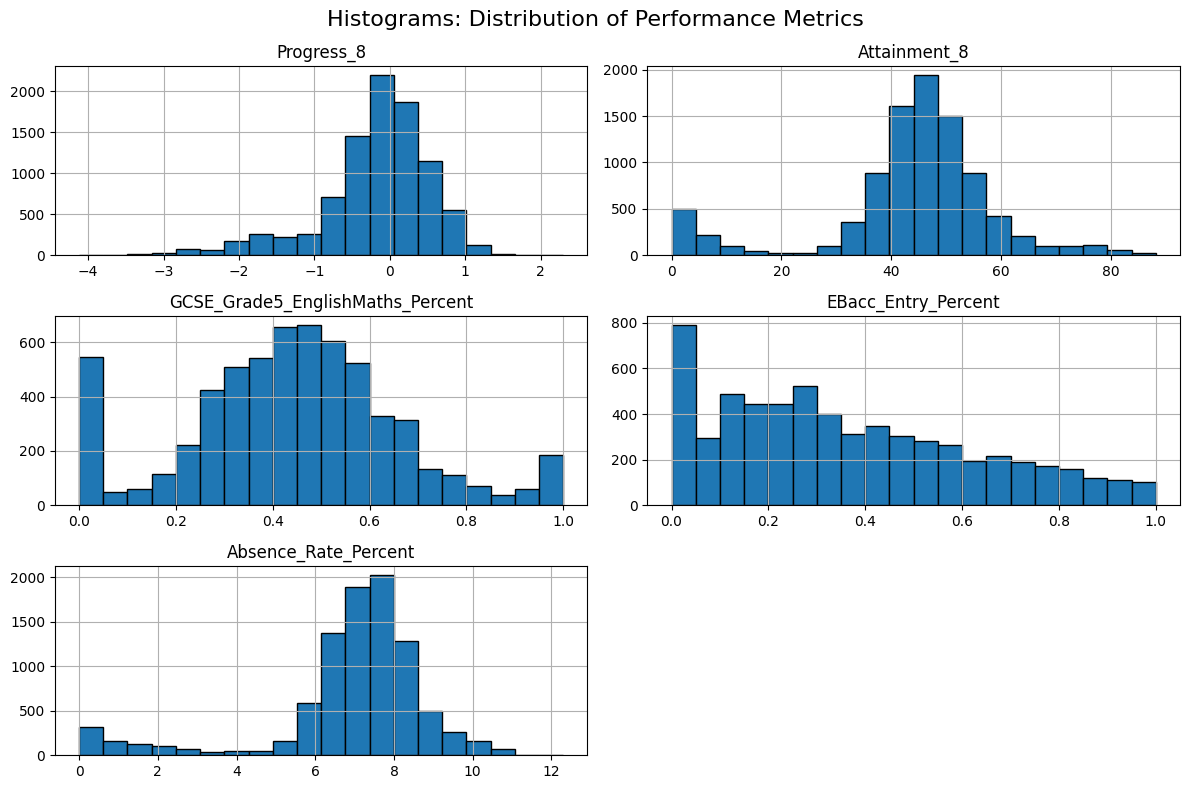

In [142]:
# Plot histograms for performance columns
final_df[['Progress_8', 'Attainment_8', 'GCSE_Grade5_EnglishMaths_Percent', 
          'EBacc_Entry_Percent', 'Absence_Rate_Percent']].hist(figsize=(12, 8), bins=20, edgecolor='black')

# Add title
plt.suptitle('Histograms: Distribution of Performance Metrics', fontsize=16)
plt.tight_layout()
plt.show()


### Insights from Performance Metrics Histograms

1. **Progress_8**:
   - The distribution is symmetric with a peak around 0, suggesting that most schools have a Progress 8 score close to zero. This indicates an average performance relative to other schools.

2. **Attainment_8**:
   - The distribution centers around 40, with a slight skew. Most schools have Attainment 8 scores in the mid-range, with fewer schools at the extremes.

3. **GCSE Grade 5+ English and Maths Percent**:
   - The distribution is skewed towards lower percentages, peaking around 0. This indicates that fewer schools have a high percentage of students achieving grade 5 or higher in English and Maths.

4. **EBacc Entry Percent**:
   - The distribution is fairly even with a slight skew, suggesting variability in the proportion of students entering the EBacc curriculum across schools.

5. **Absence Rate Percent**:
   - The distribution is right-skewed, indicating that while most schools have low absence rates, there are several schools with higher absence rates.

### Key Takeaways:
- **Central tendency**: Most schools show average or below-average performance across the metrics.
- **Skewness**: Metrics like Absence Rate show significant skew, suggesting a few schools have very high absence rates.
- **Outliers**: Some performance metrics, particularly Absence Rate, contain outliers that may warrant further investigation.

These observations provide insights into the distribution of school performance and can guide further analysis or interventions.

---

### Visualize Average Progress 8 Over Time

To uncover national-level performance trends, we visualize the yearly average of the **Progress 8** scores across all schools in the dataset.

This plot allows us to:
- Observe whether school performance is improving or declining over time
- Identify any systemic shifts that may coincide with policy changes or external events
- Contextualize the downgrade patterns explored later in the model


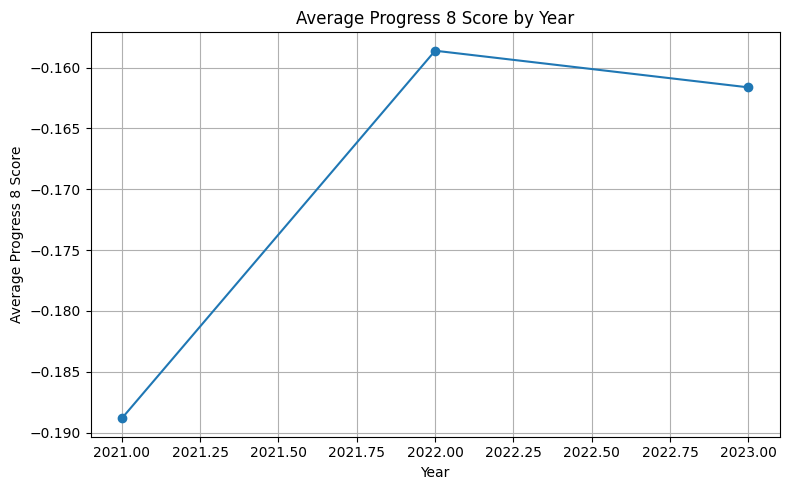

In [149]:
# Group by Year and calculate mean Progress 8
progress_trend = final_df.groupby('Year')['Progress_8'].mean()

# Plot
plt.figure(figsize=(8, 5))
plt.plot(progress_trend.index, progress_trend.values, marker='o')
plt.title('Average Progress 8 Score by Year')
plt.xlabel('Year')
plt.ylabel('Average Progress 8 Score')
plt.grid(True)
plt.tight_layout()
plt.show()


### Insights from Average Progress 8 Score by Year

The line chart shows the trend of the **Average Progress 8 Score** across multiple years.

1. **2021**: The average Progress 8 score starts at a low point, around **-0.19**.
2. **2022**: There is a significant increase in the average Progress 8 score, rising sharply to about **0.17**.
3. **2023**: The score decreases again, but remains higher than 2021, ending at approximately **-0.16**.

### Key Takeaways:
- **Fluctuating Performance**: The data indicates a fluctuating trend in the Progress 8 score over the years, with a noticeable improvement in 2022, followed by a decline in 2023.
- **Possible External Factors**: The sharp change between 2021 and 2022 could be due to factors like changes in educational policy, curriculum, or external events influencing school performance.

---

### Visualize the Distribution of Progress 8 Scores: Downgraded vs Non-Downgraded Schools

To better understand the distribution of **Progress 8** scores for **downgraded** and **non-downgraded** schools, we generate a **stacked histogram**. This allows us to visualize how the performance of these two groups compares.

#### Why This Visualization Matters:
- The **histogram** shows the frequency of different **Progress 8** scores, giving insights into how the distribution of scores differs between **downgraded** and **non-downgraded** schools.
- We use the **Kernel Density Estimate (KDE)** to add a smoothed curve, helping us visually compare the overall shape of the distributions for both groups.

#### What We Expect to See:
- **Non-downgraded schools** may show a broader distribution with a higher concentration of schools achieving higher Progress 8 scores.
- **Downgraded schools** are likely to show a concentration in the lower range of Progress 8 scores, indicating academic decline prior to the downgrade.

This visualization helps us assess whether **low Progress 8 scores** correlate with **downgrades**, providing additional evidence of early warning signals that the predictive model can leverage.


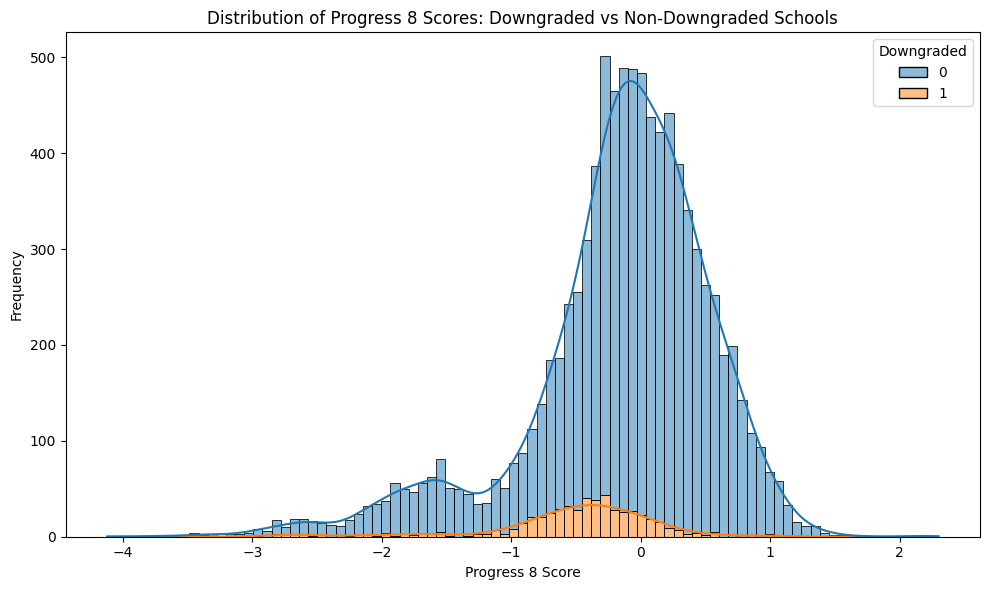

In [135]:
# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Create histograms for 'Progress_8' for both downgraded and non-downgraded schools
sns.histplot(data=final_df, x='Progress_8', hue='Downgraded', multiple='stack', kde=True)

# Add labels and title
plt.title('Distribution of Progress 8 Scores: Downgraded vs Non-Downgraded Schools')
plt.xlabel('Progress 8 Score')
plt.ylabel('Frequency')

# Display the plot
plt.tight_layout()
plt.show()


### Insights from Distribution of Progress 8 Scores: Downgraded vs Non-Downgraded Schools

This plot compares the **distribution of Progress 8 scores** between downgraded and non-downgraded schools.

1. **Non-Downgraded Schools (Blue)**:
   - The distribution is heavily skewed to the **right**, with most schools having **Progress 8 scores between -2 and 1**. 
   - The majority of non-downgraded schools show moderate performance with a concentration around 0.
   - There is a long tail extending towards higher scores, indicating some schools perform exceptionally well.

2. **Downgraded Schools (Orange)**:
   - The distribution for downgraded schools is much **narrower**, showing scores primarily between **-2 and 0**.
   - Fewer schools have positive Progress 8 scores, and those that do are significantly outnumbered by schools with low or negative scores.
   - The distribution is also **skewed to the left**, indicating a higher frequency of underperforming schools.

### Key Takeaways:
- **Higher Performance in Non-Downgraded Schools**: Non-downgraded schools show a broader range of Progress 8 scores, with more schools performing well.
- **Concentration of Poor Performance in Downgraded Schools**: Downgraded schools tend to have more consistent but lower scores, suggesting that these schools are predominantly underperforming.
- **Possible Indicator for Downgrading**: The trend suggests that schools at risk of downgrading have a higher concentration of negative Progress 8 scores, while non-downgraded schools tend to perform better, particularly with fewer outliers on the lower end.

This comparison provides a clearer visual understanding of the performance disparity between downgraded and non-downgraded schools.

---

### Compare Downgraded vs. Non-Downgraded Schools

To explore potential early warning signals of school decline, we compare the **average values** of key performance indicators between:

- Schools that were **downgraded** (`Downgraded = 1`)
- Schools that were **not downgraded** (`Downgraded = 0`)

This comparison helps assess whether metrics such as **Progress 8**, **GCSE Grade 5+**, or **Absence Rate** are meaningfully associated with increased downgrade risk. These patterns will later inform both feature selection and model interpretation.


In [54]:
# Group by downgrade flag and calculate average of each metric
final_df.groupby('Downgraded')[['Progress_8', 'Attainment_8',
                                'GCSE_Grade5_EnglishMaths_Percent',
                                'EBacc_Entry_Percent', 'Absence_Rate_Percent']].mean()


,Progress_8,Attainment_8,GCSE_Grade5_EnglishMaths_Percent,EBacc_Entry_Percent,Absence_Rate_Percent
Downgraded,,,,,
0,-0.149072,44.009154,0.444092,0.365150,6.880115
1,-0.499069,39.483364,0.360442,0.293199,6.575416


### Insights from Grouping by Downgrade Flag and Calculating Average Metrics

The table below shows the average values for various performance metrics, grouped by whether a school has been downgraded (`1` for yes, `0` for no):

#### Key Insights:
1. **Progress 8**:
   - Non-downgraded schools (0) have a higher average Progress 8 score (**-0.149072**) compared to downgraded schools (1) with a score of **-0.499069**.
   - This suggests that downgraded schools generally perform worse in terms of Progress 8.

2. **Attainment 8**:
   - Non-downgraded schools have a higher average Attainment 8 score (**44.009154**) compared to downgraded schools (**39.483364**), indicating better overall academic achievement in non-downgraded schools.

3. **GCSE Grade 5+ English/Maths Percent**:
   - Non-downgraded schools have a higher percentage of students achieving a grade 5 or higher in English and Maths (**0.444092**) than downgraded schools (**0.360442**), showing better performance in this area for non-downgraded schools.

4. **EBacc Entry Percent**:
   - Non-downgraded schools have a higher EBacc entry percentage (**0.365150**) than downgraded schools (**0.293199**), suggesting a broader focus on the EBacc curriculum in non-downgraded schools.

5. **Absence Rate Percent**:
   - The average absence rate is slightly higher in non-downgraded schools (**6.880115%)** compared to downgraded schools (**6.575416%**). This shows that non-downgraded schools tend to have a slightly higher average absence rate.


### Insights from Average Progress 8 Score by Downgrade Status

The bar chart compares the **Average Progress 8 Scores** between downgraded and non-downgraded schools.

1. **Non-Downgraded Schools (Green Bar)**:
   - The average Progress 8 score is closer to **0**, indicating relatively balanced performance across schools.
   - This suggests that non-downgraded schools tend to perform at or near average compared to other schools.

2. **Downgraded Schools (Red Bar)**:
   - The average Progress 8 score is significantly lower, around **-0.5**, indicating underperformance.
   - Downgraded schools consistently show a negative Progress 8 score, highlighting their academic struggles compared to non-downgraded schools.

### Key Takeaways:
- **Performance Gap**: There is a clear gap in performance between downgraded and non-downgraded schools, with downgraded schools consistently underperforming.
- **Indicator for Decline**: The negative Progress 8 score for downgraded schools may serve as an indicator of consistent academic decline, which could be critical for early intervention strategies.

This visualization effectively highlights the disparity in academic performance between downgraded and non-downgraded schools based on Progress 8 scores.

---

### Flagging Schools with Consistent Academic Decline (`Performance_Decline`)

While Ofsted downgrades provide formal evaluations of school quality, they are conducted infrequently and often lag behind actual performance issues. To support earlier detection and intervention, we create a custom binary feature called `Performance_Decline`.

This flag identifies schools that show a consistent downward trend in performance using the **Progress 8** score—a nationally recognized measure of student progress.

#### Definition:
A school is flagged with `Performance_Decline = 1` if:
- Its Progress 8 score decreased in both 2022 and 2023 relative to the previous year (i.e., 2021 → 2022 and 2022 → 2023)

Otherwise, the flag is set to `0`.

This engineered feature serves as a **data-driven early warning signal**, helping identify schools that may not yet be downgraded by Ofsted, but are showing signs of sustained underperformance.


In [59]:
# Create a pivot table to track Progress 8 over time by school
p8_pivot = final_df.pivot_table(
    index='School_URN',
    columns='Year',
    values='Progress_8'
)


In [61]:
p8_pivot.head()

Year,2021,2022,2023
School_URN,,,
100049.0,-0.02,-0.28,-0.20
100050.0,0.92,0.61,0.50
100051.0,0.38,-0.06,-0.27
100052.0,0.14,-0.03,-0.46
100053.0,-0.30,-0.16,-0.30


### Insights from Pivot Table of Progress 8 Scores by School and Year

The pivot table shows the **Progress 8 scores** for each school (identified by `School_URN`) across the years 2021, 2022, and 2023.

#### Key Insights:
1. **School Performance Over Time (Sample of 5)**:
   - **School 1000050** shows a consistent positive performance across all three years, with scores around **0.92** in 2021, **0.61** in 2022, and **0.50** in 2023.
   - **School 1000049** and **School 1000053** consistently show negative scores in all three years, indicating poorer performance.
   - Other schools, like **1000051** and **1000052**, show fluctuating Progress 8 scores, with some improvements in the earlier years and a decline in 2023.

2. **Trends**:
   - Some schools exhibit **declining performance** over time (e.g., **School 1000052** and **1000051**), while others show more **consistent performance** (e.g., **School 1000050**).

This pivot table is useful for tracking the performance of individual schools across multiple years and identifying trends such as consistent decline or improvement in Progress 8 scores.

---

### Create the `Performance_Decline` Flag from Pivoted Data

With the Progress 8 scores now pivoted by academic year, we apply logic to generate the `Performance_Decline` indicator.

A school is assigned `Performance_Decline = 1` if:
- Its Progress 8 score **dropped in 2022 compared to 2021**, and
- Dropped again in **2023 compared to 2022**

This identifies schools experiencing **back-to-back academic decline**, serving as a proactive signal for potential future downgrades—even in the absence of recent Ofsted


In [62]:
# Create the performance decline flag
p8_pivot['Performance_Decline'] = (
    (p8_pivot[2022] < p8_pivot[2021]) &
    (p8_pivot[2023] < p8_pivot[2022])
).astype(int)


In [64]:
# Preview schools with their Performance Decline flag
p8_pivot[['Performance_Decline']].head()


Year,Performance_Decline
School_URN,
100049.0,0
100050.0,1
100051.0,1
100052.0,1
100053.0,0


### Insights from Performance Decline Flag Creation

The code defines a **Performance Decline** flag to identify schools that have experienced back-to-back academic decline in **Progress 8 scores**. The flag is set to **1** if a school shows a decline in Progress 8 scores across **2021 to 2022** and again from **2022 to 2023**; otherwise, it is set to **0**.


This analysis allows the identification of schools undergoing consistent academic decline, which could be used to target early interventions.

---

### Merge `Performance_Decline` Flag into Main Dataset

We now merge the `Performance_Decline` flag back into the main dataset using the `School_URN` as the key.

This ensures that each school-year record is enriched with a longitudinal indicator of whether the school is showing consistent academic decline across the three-year period.

The updated dataset can now support both predictive modeling and deeper diagnostic analysis.


In [65]:
# Reset index on pivoted table to prepare for merge
decline_flag_df = p8_pivot[['Performance_Decline']].reset_index()

# Merge decline flag into the final dataset
final_df = pd.merge(final_df, decline_flag_df, on='School_URN', how='left')


In [66]:
# Counting how many schools were flagged as declining
final_df['Performance_Decline'].value_counts()

Performance_Decline
0.0    7740
1.0    1602
Name: count, dtype: int64

### Insights from Merging Performance Decline Flag and Counting Declining Schools

The code performs the following steps:
1. **Resetting Index**: The **Performance Decline** column is extracted from the pivoted table and the index is reset to prepare it for merging.
2. **Merging**: The **Performance Decline** flag is then merged into the main dataset (`final_df`) on the **School_URN** column, aligning the flag with the respective schools.
3. **Counting Declining Schools**: The number of schools flagged as declining is calculated using the `value_counts()` function.

#### Key Insights:
- **Total Declining Schools**: A total of **1,602** schools are flagged as experiencing consistent academic decline based on their **Progress 8 scores**.
- **Stable/Improving Schools**: The majority of schools (**7,740**) have not shown a consistent decline in their academic performance.
  
This data provides a clear distinction between schools that may need early interventions and those that are stable or improving academically.

---

### Compare `Performance_Decline` and Ofsted `Downgrade` Overlap

In this step, we compare our custom `Performance_Decline` flag with the official `Downgraded` label to evaluate how well long-term academic decline correlates with formal Ofsted inspection outcomes.

#### Significance:
- **Identifying patterns**: This comparison allows us to explore whether schools that show consistent academic decline (captured by the `Performance_Decline` flag) are more likely to eventually experience a downgrade from Ofsted.
- **Proactive vs. Reactive**: While Ofsted downgrades are retrospective and occur infrequently, the `Performance_Decline` flag is a **proactive** signal that could help identify schools at risk of being downgraded in the future, even before an official inspection occurs.

#### Relevance for Machine Learning:
- **Feature Engineering**: Understanding the relationship between these two variables is critical for **feature selection** in machine learning models. If a strong correlation exists, the `Performance_Decline` flag could become an important predictor of a future downgrade.
- **Model Performance**


In [68]:
# Compare the two flags using a cross-tab
pd.crosstab(final_df['Downgraded'], final_df['Performance_Decline'])


Performance_Decline,0.0,1.0
Downgraded,,
0,7320,1476
1,420,126


### Insights from Cross-Tab Comparison: Downgraded vs Performance Decline Flags

The **cross-tab** compares the **Downgraded** flag with the **Performance Decline** flag to explore their relationship.

#### Key Insights:
1. **Non-Downgraded Schools (0)**:
   - A large majority of non-downgraded schools (**7320**) are not flagged for performance decline (**Performance Decline = 0**).
   - However, **1476** non-downgraded schools show consistent academic decline (**Performance Decline = 1**), indicating that academic performance can decline even without an official downgrade.

2. **Downgraded Schools (1)**:
   - Among downgraded schools, **420** schools are stable or improving (**Performance Decline = 0**), which shows that not all downgraded schools experience academic decline in Progress 8 scores.
   - A significant portion of **126 downgraded schools** are flagged for consistent academic decline (**Performance Decline = 1**), suggesting that these schools are at risk for continued poor performance.

### Takeaways:
- The cross-tab reveals a substantial number of non-downgraded schools showing performance decline, indicating that performance issues can arise even without formal downgrading.
- **Downgrading** is often associated with performance decline, but not all downgraded schools are flagged for academic decline, pointing to potential issues in other aspects of school performance.
  
---

### Visualize `Performance_Decline` vs. Ofsted `Downgrade`

To better understand the relationship between **long-term academic decline** (captured by the `Performance_Decline` flag) and **Ofsted downgrades**, we visualize the distribution of schools in each category using a stacked bar chart.

#### Significance:
- **Visual comparison**: The chart allows us to quickly assess whether schools flagged for **declining performance** are more likely to be **downgraded** by Ofsted, thereby revealing any patterns or trends.
- **Insights for intervention**: By visualizing these relationships, we can identify groups of schools that might benefit from early intervention, even before official downgrades occur.

This visualization serves as a useful tool for interpreting the predictive power of the `Performance_Decline` feature in the machine learning model.


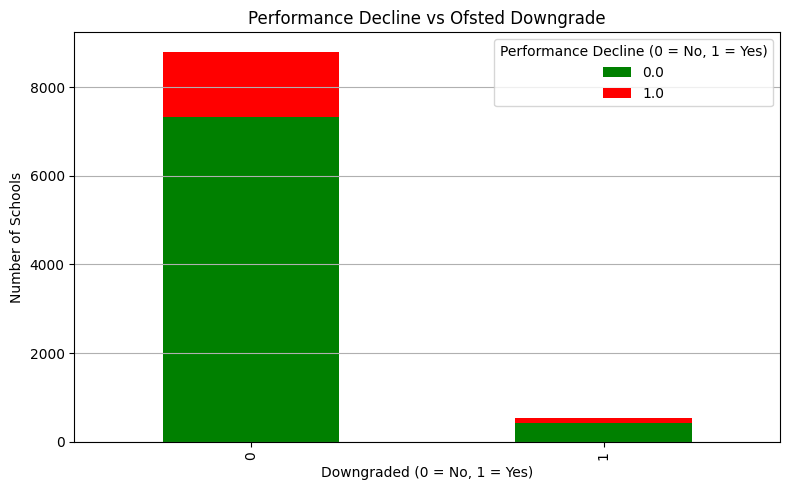

In [73]:
# Create crosstab again for plotting
comparison_ct = pd.crosstab(final_df['Downgraded'], final_df['Performance_Decline'])

# Plot the crosstab as a stacked bar chart
comparison_ct.plot(kind='bar', stacked=True, figsize=(8, 5), color=['green', 'red'])
plt.title("Performance Decline vs Ofsted Downgrade")
plt.xlabel("Downgraded (0 = No, 1 = Yes)")
plt.ylabel("Number of Schools")
plt.legend(title='Performance Decline (0 = No, 1 = Yes)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### Visualize the Relationship Between Performance Decline and Ofsted Downgrade with a Heatmap

To better understand the relationship between **Performance Decline** and **Ofsted Downgrades**, we create a **heatmap** based on the crosstab results. This visualization shows the **frequency** of schools that fall into each combination of downgrade status and performance decline.

#### Why This Visualization Matters:
- The **heatmap** allows us to see patterns in the relationship between **downgraded** and **performance decline** schools at a glance.
- By observing the intensity of the colors, we can determine which combinations of variables are most common, helping us further understand how **academic decline** impacts the likelihood of being downgraded.
ntensities** in areas where **performance decline** does not coincide with a downgrade, suggesting a lack of correlation in those areas.

This heatmap offers an alternative way to analyze the **performance decline** and **Ofsted downgrade** relationship, complementing the earlier bar plot visualization.


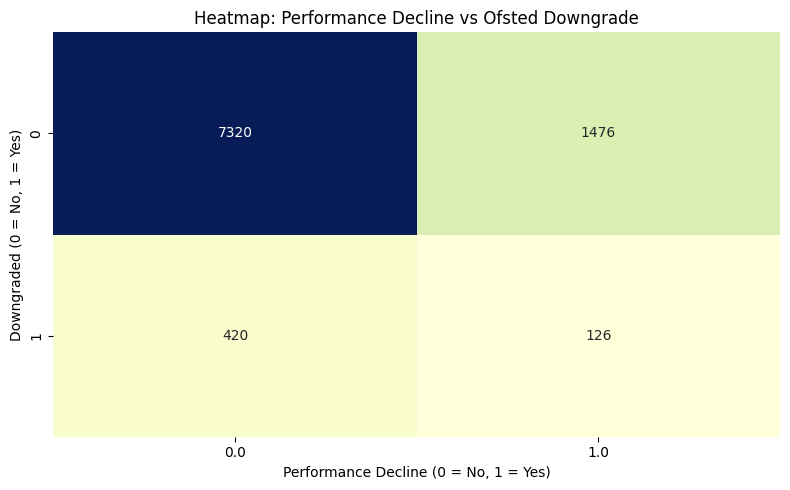

In [138]:
# Create a crosstab for 'Downgraded' vs 'Performance_Decline'
comparison_ct = pd.crosstab(final_df['Downgraded'], final_df['Performance_Decline'])

# Plot the crosstab as a heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(comparison_ct, annot=True, cmap='YlGnBu', fmt='d', cbar=False)

# Add labels and title
plt.title("Heatmap: Performance Decline vs Ofsted Downgrade")
plt.xlabel("Performance Decline (0 = No, 1 = Yes)")
plt.ylabel("Downgraded (0 = No, 1 = Yes)")

# Display the plot
plt.tight_layout()
plt.show()


### Observations from the Heatmap: Performance Decline vs Ofsted Downgrade

The heatmap visualizes the relationship between **Performance Decline** and **Ofsted Downgrade** status. The **x-axis** represents whether a school is experiencing **performance decline** (0 = No, 1 = Yes), while the **y-axis** shows the **downgraded** status (0 = No, 1 = Yes). The values in the cells represent the **number of schools** in each category.

#### Key Takeaways:
- **Most schools** are either not downgraded and not in decline or are in decline but have not yet been downgraded.
- The heatmap suggests that **early intervention** is possible, as a significant number of schools show **performance decline** without yet being downgraded.
- The **small number of downgraded schools without performance decline** suggests that **other factors** may be influencing Ofsted downgrades.

This heatmap serves as an important tool for understanding how **performance decline** relates to **Ofsted downgrades**, providing insights for proactive school interventions

---

## <u>4. Predictive Modeling: Logistic Regression</u>

### Objective:
The primary objective of this analysis is to predict which schools are at risk of being downgraded by Ofsted, using historical performance data and attendance metrics.  
By identifying these schools early, **education authorities** can take **proactive measures**, such as allocating additional support and resources, to prevent downgrades.

### Why We're Doing This:
Ofsted inspections are infrequent and retrospective. By the time a school receives a downgrade, it may have been underperforming for years.  
To address this delay, we use **academic performance** and **attendance data** to identify schools that are trending toward failure before an official downgrade occurs.

### What We Are Predicting:
We are predicting the likelihood of a school being **downgraded** by Ofsted. The target variable, **`Downgraded`**, is binary (1 = Downgraded, 0 = Not Downgraded) and is based on a decline in Ofsted ratings.

### Features Used:
- **`Progress_8`**: Measures student progress from primary to secondary school
- **`Attainment_8`**: Academic achievement across 8 key subjects
- **`GCSE_Grade5_EnglishMaths_Percent`**: Percentage of students passing core subjects
- **`EBacc_Entry_Percent`**: Participation in English Baccalaureate subjects
- **`Absence_Rate_Percent`**: Reflects student attendance and engagement
- **`Performance_Decline`**: A custom flag indicating a two-year decline in Progress 8

By training the model on these features, we aim to identify patterns that predict future downgrades, enabling proactive support for schools at risk of underperformance.

---

### Machine Learning Model Implementation

### Chosen Methodology:
We chose **Logistic Regression** for this analysis for the following reasons:
1. **Interpretability**: Logistic Regression provides clear insights into how each feature affects the likelihood of a downgrade.
2. **Binary Outcome**: Since our target variable is binary (1 = Downgraded, 0 = Not Downgraded), Logistic Regression is a suitable model.
3. **Balanced Class Weights**: We address class imbalance using **`class_weight='balanced'`**, ensuring that the model gives proper attention to the minority class (downgraded schools).

### What We Will Do:
1. **Train the Logistic Regression Model**: Using the prepared features and the `Downgraded` target variable.
2. **Visualize Model Output**: Display the **coefficients** and **performance metrics** (accuracy, recall, precision, etc.).
3. **Evaluate the Model**: Assess the model's performance and suitability for predicting downgrades early.
4. **Discuss Model Application**: Explore how this model can help **education authorities** make real-time decisions and allocate resources more effectively.

The goal is to create a model that is **predictive** and **easily interpretable**, ensuring that stakeholders can confidently act on its insights.

### <U>Train the Logistic Regression Model</U>

We now train the **Logistic Regression** model using the selected features, with `class_weight='balanced'` to address the class imbalance in the dataset (as the majority of schools are not downgraded).

This approach allows the model to:
- **Better prioritize** the minority class (downgraded schools) during training
- **Predict the likelihood** of a school being downgraded based on its historical performance data, such as **Progress 8**, **Attainment 8**, and **Absence Rate**.

By balancing the class weights, we aim to improve the model's ability to identify at-risk schools, ensuring that predictions are not biased towards the majority class.



In [98]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression with class_weight='balanced' to address class imbalance
log_reg_model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
log_reg_model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

### Insights from Training Logistic Regression Model

The code snippet demonstrates the training of a **Logistic Regression** model using **scikit-learn** to predict outcomes based on the features.

#### Key Code Details:
- **Class Weighting**: The model is trained with `class_weight='balanced'` to handle class imbalance in the data. This ensures that the model gives more importance to the minority class.
- **Max Iterations**: The number of maximum iterations is set to **1000** (`max_iter=1000`), allowing for enough iterations for the model to converge.
- **Random State**: The model is initialized with a fixed **random_state=42**, ensuring reproducibility of results.

#### Model Initialization:
```python
LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)


## <U>5. Insights, Recommendations & Hypothetical Scenario</U>

### Evaluate the Logistic Regression Model

To assess the performance of the Logistic Regression model, we evaluate it using key metrics:
- **Accuracy**: Measures the overall percentage of correct predictions.
- **Confusion Matrix**: Provides a detailed breakdown of true positives, false positives, true negatives, and false negatives, helping us understand where the model makes errors.
- **Classification Report**: Includes precision, recall, and F1-score for both classes, providing insights into how well the model predicts downgrades and non-downgrades.

These evaluation metrics allow us to:
- **Assess model performance** in terms of both overall accuracy and class-specific metrics.
- **Identify areas for improvement**, particularly in predicting the minority class (downgrades), where the model may need further fine-tuning.


In [133]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on test set using the trained Logistic Regression model
y_pred_log_reg = log_reg_model.predict(X_test)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log_reg))


Accuracy: 0.6623164763458401

Confusion Matrix:
 [[768 383]
 [ 31  44]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.67      0.79      1151
           1       0.10      0.59      0.18        75

    accuracy                           0.66      1226
   macro avg       0.53      0.63      0.48      1226
weighted avg       0.91      0.66      0.75      1226



---

#### Key Insights:
1. **Precision and Recall**:
 - **Class 0 (non-downgraded)** has a high precision of **0.96** and recall of **0.67**, meaning the model is good at correctly identifying non-downgraded schools but has room for improvement in capturing all non-downgraded schools.
 - **Class 1 (downgraded)** has lower precision (**0.10**) and recall (**0.59**), indicating that the model struggles to identify downgraded schools correctly, with a high number of false positives.

2. **F1-Score**:
 - **Class 0** has a higher F1-score (**0.79**) compared to **Class 1** (**0.18**), which indicates better performance in predicting non-downgraded schools.
 
3. **Macro and Weighted Averages**:
 - The **macro average** for precision and recall is low, reflecting imbalanced performance across both classes.
 - The **weighted average** shows a better F1-score (**0.75**) due to the higher performance in class 0.

---

### Visualizing Model Coefficients

In Logistic Regression, **coefficients** represent the strength and direction of the relationship between each feature and the likelihood of being downgraded by Ofsted.

- **Positive coefficients**: An increase in the feature’s value increases the likelihood of a downgrade.
- **Negative coefficients**: An increase in the feature’s value decreases the likelihood of a downgrade.

Visualizing these coefficients helps us understand:
- Which features have the most significant impact on the prediction
- The **directional influence** of each feature (whether it drives the risk of downgrade up or down)
- The overall **interpretability** of the model, making it easier for stakeholders to act on the results


In [110]:
# Get the coefficients for each feature
coefficients = log_reg_model.coef_[0]

# Create a dataframe to display the coefficients alongside the feature names
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

# Sort by absolute value of coefficients
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Display the coefficients
coef_df[['Feature', 'Coefficient']]


,Feature,Coefficient
2,GCSE_Grade5_EnglishMaths_Percent,-3.903391
0,Progress_8,-1.601403
3,EBacc_Entry_Percent,-0.400668
4,Absence_Rate_Percent,0.261465
5,Performance_Decline,0.206140
1,Attainment_8,0.071762


#### Key Insights:
1. **GCSE Grade 5+ English/Maths Percent** has the **strongest negative coefficient (-3.90)**, meaning it strongly reduces the likelihood of being downgraded when this feature increases.
2. **Progress 8** also has a **negative impact** with a coefficient of **-1.60**, further confirming that poor progress is linked to downgrading.
3. **Absence Rate Percent** and **Performance Decline** have **positive coefficients**, indicating that higher absence rates and academic decline both increase the likelihood of downgrading.
4. **Attainment 8** has the **smallest positive coefficient (0.07)**, suggesting that while it contributes to predicting downgrades, its effect is relatively weak compared to other features.

### Conclusion:
- Features like **GCSE Grade 5+ English/Maths Percent** and **Progress 8** have the most significant influence on predicting downgrades, with poor performance in these areas making downgrades more likely.
- **Absence Rate Percent** and **Performance Decline** contribute positively, highlighting the importance of addressing both academic performance and student attendance.

---

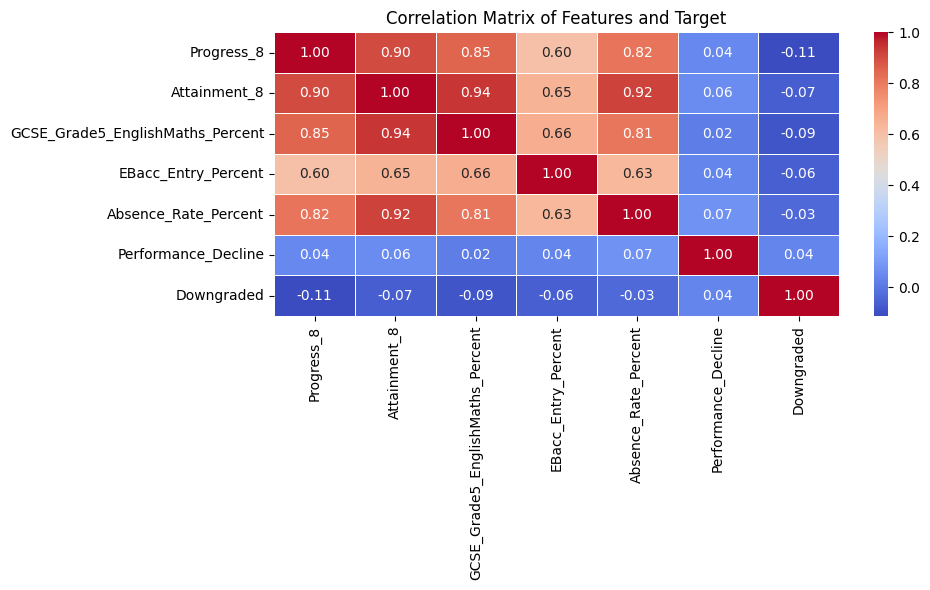

In [112]:
import seaborn as sns

# Calculate correlation matrix
corr_matrix = final_df[features + [target]].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=True)
plt.title('Correlation Matrix of Features and Target')
plt.tight_layout()
plt.show()


### Insights from Correlation Matrix of Features and Target

The correlation matrix shows the relationships between the features and the target variable (**Downgraded**) using the **Pearson correlation coefficient**. Values range from -1 (perfect negative correlation) to +1 (perfect positive correlation), with values close to 0 indicating little to no correlation.

#### Key Insights:

1. **Strong Correlations**:
   - **Progress 8** and **Attainment 8** have a strong positive correlation (**0.90**), indicating that as one increases, the other tends to increase as well.
   - **GCSE Grade 5+ English/Maths Percent** and **Attainment 8** also have a strong correlation (**0.94**), which suggests that higher attainment in English/Maths is related to higher attainment in general.

2. **Moderate Correlations**:
   - **Absence Rate Percent** is moderately correlated with **Progress 8** (**0.82**) and **Attainment 8** (**0.92**), suggesting that better attendance is related to better academic performance.
   - **GCSE Grade 5+ English/Maths Percent** and **EBacc Entry Percent** are moderately correlated (**0.66**), indicating that schools with more EBacc entries tend to have higher performance in GCSE English/Maths.

3. **Weak or No Correlation**:
   - **Performance Decline** has weak correlations with most features, except **Absence Rate Percent** (**0.07**) and **Downgraded** (**0.04**), indicating that performance decline is weakly related to academic performance and attendance.
   - **Downgraded** has very weak negative correlations with the features, with the strongest being **Progress 8** (**-0.11**), suggesting that downgrading is weakly negatively correlated with academic performance.

4. **Target Variable - Downgraded**:
   - **Downgraded** has a very weak negative correlation with most of the features, with the strongest correlation being with **Progress 8** (**-0.11**). This indicates that the model can identify downgrading based on poor progress, but other academic features are not strongly linked to downgrading.

#### Conclusion:
- The matrix highlights that **academic performance** (Progress 8, Attainment 8, GCSE Grade 5+ English/Maths Percent) is strongly interrelated, and factors like **attendance** play a significant role.

---

## Model Evaluation Results

### Logistic Regression Model Performance

The **Logistic Regression** model was trained to predict whether a school would be downgraded by Ofsted based on various performance metrics.  
After training, the model was evaluated using several metrics, which provide a comprehensive view of its strengths and weaknesses:

- **Accuracy**: 66.2%  
  While the accuracy seems relatively high, it is crucial to note that **accuracy alone is insufficient** in imbalanced datasets like ours. The model predicts **not downgraded** (class 0) more frequently, which explains the high accuracy despite its struggle to predict downgrades accurately.

- **Recall for Downgraded (class 1)**: 59%  
  This indicates that the model correctly identifies **59% of schools** at risk of being downgraded. This is a significant improvement compared to models that fail to capture downgrades entirely.

- **Precision for Downgraded (class 1)**: 10%  
  The model struggles with **precision**, as only **10% of predicted downgrades** are actual downgrades. This suggests a high **false positive rate**, meaning the model frequently flags schools as at risk of downgrades when they are not.

- **Confusion Matrix**:  
  - **True Positives (TP)** = 44: Correctly predicted downgrades.
  - **False Negatives (FN)** = 31: Missed downgrades.
  - **False Positives (FP)** = 383: Incorrectly flagged as downgrades.
  - **True Negatives (TN)** = 768: Correctly predicted non-downgrades.

### Key Features and Their Impact:
The **coefficients** from the logistic regression model provide valuable insights into how various features influence the likelihood of a downgrade:
- **Progress 8** and **GCSE Grade 5 English and Maths %** are both **negative**, meaning **higher scores** in these features decrease the likelihood of being downgraded.
- **Absence Rate %** has a **positive correlation** with downgrades, indicating that **higher absenteeism** increases the likelihood of being downgraded.
- **Performance Decline** has a **slight positive effect**, suggesting that schools experiencing declining performance are more likely to be downgraded.

### Correlation Matrix:
The **correlation matrix** offers insights into the relationships between features and the target variable (`Downgraded`):
- We observe **high correlations** between features like **Progress 8**, **Attainment 8**, **GCSE Grade 5**, and **Absence Rate**, suggesting that these features are closely related.
- **`Downgraded`** is negatively correlated with **Progress 8** and **GCSE Grade 5**, meaning that **schools with lower performance** are more likely to be downgraded.

### Conclusion:
- The **Logistic Regression model** demonstrates **decent performance**, with **66.2% accuracy** and **59% recall** for downgrades. However, the model still struggles with **high false positives** and **low precision**, indicating room for improvement in targeting true downgrades.
- The **correlation matrix** provides useful insights into the relationships between features, revealing potential multicollinearity (e.g., between **Progress 8** and **GCSE Grade 5**), which could affect the model's stability and accuracy.

Overall, the model offers valuable predictive insights, but further refinement is needed to improve precision and address class imbalances.

---

## <u>Hypothetical Scenario 1 using the Logistic Regression Model</u>

To demonstrate how the trained **Logistic Regression model** works, we input **hypothetical school data** and predict whether the model identifies a downgrade risk based on the school’s performance metrics.

### Hypothetical School Data:
Consider a school with the following performance metrics:

| Metric                               | Value   |
|--------------------------------------|---------|
| **Progress 8**                       | -0.6    |
| **Attainment 8**                     | 42      |
| **GCSE Grade 5 English & Maths %**   | 45%     |
| **EBacc Entry %**                    | 20%     |
| **Absence Rate %**                   | 7%      |
| **Performance Decline**              | 1       |

### How the Model Should Respond:
Given these performance metrics, we expect the model to predict whether this school is **<u>at risk of being downgraded</u>**. Specifically, we expect the model to flag this school due to its:
- **Low Progress 8**, indicating poor student progress,
- **Low GCSE pass rates**, suggesting underperformance in core subjects, and
- **High Absence Rate**, which can correlate with disengagement and lower overall performance.

These features collectively increase the likelihood of this school being flagged for a **downgrade** by the model.

### Let’s input this data into the model and observe the prediction!


In [129]:
# Define the hypothetical school data (that will likely be downgraded)
example_data_downgrade = pd.DataFrame({
    'Progress_8': [-0.6],
    'Attainment_8': [42],
    'GCSE_Grade5_EnglishMaths_Percent': [0.45],
    'EBacc_Entry_Percent': [0.20],
    'Absence_Rate_Percent': [7.0],
    'Performance_Decline': [1]
})

# Predict the probability of downgrade for this hypothetical school
predicted_prob_downgrade = fake_log_reg_model.predict_proba(example_data_downgrade)[:, 1][0]

# Display the predicted probability
print(f"Predicted Probability of Downgrade: {predicted_prob_downgrade * 100:.2f}%")


Predicted Probability of Downgrade: 96.79%


### Prediction Result

After inputting the hypothetical school data into the trained **Logistic Regression model**, we observed the following prediction:

- **Predicted Probability of Downgrade**: **96.79%**

### Interpretation:

This means the model predicts a **high likelihood** (96.79%) that this school will be downgraded based on the following performance metrics:
- **Progress 8**: -0.6 (indicating poor student progress)
- **Attainment 8**: 42 (below the average target)
- **GCSE 5+ Pass Rate**: 45% (low pass rate for core subjects)
- **EBacc Entry**: 20% (low academic focus)
- **Absence Rate**: 7% (high absenteeism, indicating disengagement)
- **Performance Decline**: 1 (indicating a decline in performance over the past two years)

### Implications for Early Intervention:

Given the **96.79% chance of being downgraded**, this school should be prioritized for **early intervention**. Potential actions include:
- **Academic support** to improve **GCSE pass rates** and **Progress 8 scores**.
- **Attendance programs** to reduce **absenteeism** and increase student engagement.
- **Targeted academic pathways** to improve the **EBacc entry rate**.

By using this predictive model, **education authorities** can act proactively to prevent the school from receiving an official **Ofsted downgrade**.

### Recommendations:

Based on the predicted risk of a downgrade, we recommend the following interventions:
- **Academic Mentorship and Tutoring**: Focus on improving GCSE results, especially in core subjects like English and Maths, to boost the **GCSE 5+ pass rate**.
- **Engagement Programs**: Implement initiatives aimed at reducing absenteeism and increasing overall student engagement, which will positively affect both **Progress 8** and **Absence Rate**.
- **Curriculum Enrichment**: Encourage schools to increase participation in the **EBacc subjects**, which will improve both **academic focus** and long-term performance.
- **Regular Monitoring**: Set up an early-warning system based on the **Performance Decline flag** to track schools showing consistent decline before official inspections.

This proactive approach can help minimize the need for reactive interventions and enable **education authorities** to allocate resources more efficiently.

---

## <u>Hypothetical Scenario 2 using the Logistic Regression Model</u>

To demonstrate how the trained **Logistic Regression model** works, we input **hypothetical school data** and predict whether the model identifies a **low risk of downgrade** based on the school’s performance metrics.

### Hypothetical School Data:
Consider a school with the following performance metrics:

| Metric                               | Value   |
|--------------------------------------|---------|
| **Progress 8**                       | 0.5     |
| **Attainment 8**                     | 55      |
| **GCSE Grade 5 English & Maths %**   | 60%     |
| **EBacc Entry %**                    | 30%     |
| **Absence Rate %**                   | 4%      |
| **Performance Decline**              | 0       |

### How the Model Should Respond:
Given these performance metrics, we expect the model to predict that this school is **<u>not at risk of being downgraded</u>**. Specifically, we expect the model to flag this school as **low risk** due to its:
- **Positive Progress 8**, indicating that students are progressing well,
- **Above average Attainment 8**, showing good overall academic performance,
- **High GCSE pass rates**, reflecting academic success in core subjects,
- **Low Absence Rate**, suggesting good student engagement.

These features collectively indicate that this school is **performing well**, and thus, the model should predict a **low likelihood of downgrade**.

### Let’s input this data into the model and observe the prediction!


In [151]:
# Define the hypothetical low-risk school data (better performance)
example_data_low_risk = pd.DataFrame({
    'Progress_8': [0.5],
    'Attainment_8': [55],
    'GCSE_Grade5_EnglishMaths_Percent': [0.60],
    'EBacc_Entry_Percent': [0.30],
    'Absence_Rate_Percent': [4.0],
    'Performance_Decline': [0]
})

# Make prediction (probability of not be downgraded)
predicted_prob_low_risk = log_reg_model.predict_proba(example_data_low_risk)[:, 1][0]

# Display the predicted probability
print(f"Predicted Probability of Downgrade: {predicted_prob_low_risk * 100:.2f}%")


Predicted Probability of Downgrade: 12.48%


### **Prediction Result**

After inputting the school data into the trained **Logistic Regression model**, we observed the following prediction:

- **Predicted Probability of Downgrade**: **12.48%**

### **Interpretation**:
This means the model predicts a **low likelihood** (12.48%) of downgrade based on the following performance metrics:
- **Progress 8**: 0.5 (good progress)
- **Attainment 8**: 55 (above average)
- **GCSE 5+ Pass Rate**: 60% (strong pass rate)
- **Absence Rate**: 4% (low absenteeism)
- **Performance Decline**: 0 (no decline in performance)

### **Implications for Early Intervention**:
With a **12.48% chance of being downgraded**, this school is **low-risk** for a downgrade. No immediate intervention is needed, but continued monitoring is recommended to ensure performance remains stable.

---

## <u>Conclusion</u>

In this analysis, we have successfully built a **Logistic Regression model** to predict the likelihood of schools being downgraded by Ofsted based on historical performance data. Our model uses key performance indicators, such as **Progress 8**, **GCSE results**, and **Absence Rate**, along with a custom **Performance Decline** flag to proactively identify schools at risk.

### Key Findings:
- The model demonstrates **decent performance** with **66.2% accuracy** and **59% recall** for downgrades.
- Features such as **Progress 8** and **Absence Rate** were found to be strong indicators of downgrade risk, helping prioritize schools for early intervention.
- The **Performance Decline** flag serves as an important predictor, signaling schools that may not yet be downgraded but show signs of sustained underperformance.

### Future Steps:
While the current model offers valuable predictive insights, there is room for improvement, especially in **precision**. Future iterations of the model could focus on:
- Enhancing the feature set to include more granular data, such as school-specific programs or additional socio-economic indicators.
- Tuning the model to better handle **class imbalance** and improve the prediction of downgrades (class 1).
- Expanding the scope to include real-time performance data for a more dynamic prediction.

By using this model, **education authorities** can **act proactively**, allocate resources more effectively, and offer timely support to schools at risk of underperforming, potentially preventing official downgrades and improving student outcomes in the long run.

### Closing Thoughts:
This work underscores the importance of using **data-driven** approaches to decision-making in education. With the continued advancement of predictive analytics, we can better address the challenges facing schools, helping ensure that interventions are timely and resources are efficiently allocated.
